In [311]:
import numpy as np
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
import nibabel as nib, nilearn as nil
import matplotlib.patches as mpatches
from skimage.draw import circle_perimeter,line, polygon,disk, line_aa
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.measure import find_contours
from skimage.transform import (rotate as rt,rescale,downscale_local_mean)
from skimage.filters import sobel
import sys
import os
sys.path.insert(0, 'core/')
from analysis import create_denoising_dataset
import nibabel as nib, scipy.io as sio
from utils import list_to_nib
from tkinter import Tk
from tkinter.filedialog import askdirectory
import cv2 as cv
from skimage import filters
from skimage.transform import rescale, downscale_local_mean

In [284]:
# hide the tk root window
Tk().withdraw() 

# user specify data directory
# print('Select directory containing the phantom data, log file, and acqtime file')
mainpath = askdirectory(title = 'Path to Phantom Data')

# make output directory
outpath = mainpath + '/Extracted Time Series'
os.makedirs(outpath, exist_ok = True)
# set path for input files 
epi_path = mainpath + '/epi/epi_corrected.nii' # Path of intensity nonuniformity corrected fMRI measurement in nifti format.
log_path = mainpath + '/epi/log.csv' # Path of phantom-log file obtained from your BrainDancer device.
acqtimes_path = mainpath + '/Acqtimes.csv' # Path of slice-acquistion order of your acquistion protocol in csv format.

In [186]:
filts = {}
filts['sobel'] = filters.sobel

In [188]:
filt = 'Sobel'
filt.lower()

'sobel'

In [339]:
slice_num = 8
lowRange = 1000
highRange = 9000
Step = 500
lvl = range(lowRange,highRange,Step)
leng = len(lvl)
rad1=7
rad2=50
step=1
imOri = nib.load(epi_path).get_fdata()[:,:,slice_num,0]
#im = rescale(imOri, 2, preserve_range = True)
im_sobel = filters.sobel(im)
im_roberts = filters.roberts(im)
im_scharr = filters.scharr(im)
im_prewitt = filters.prewitt(im)
# consider hysteresis thresholding if encounter tricky situations 
#im_prewitt = rescale(im_prewitt, 2, preserve_range = True)
img = im_prewitt

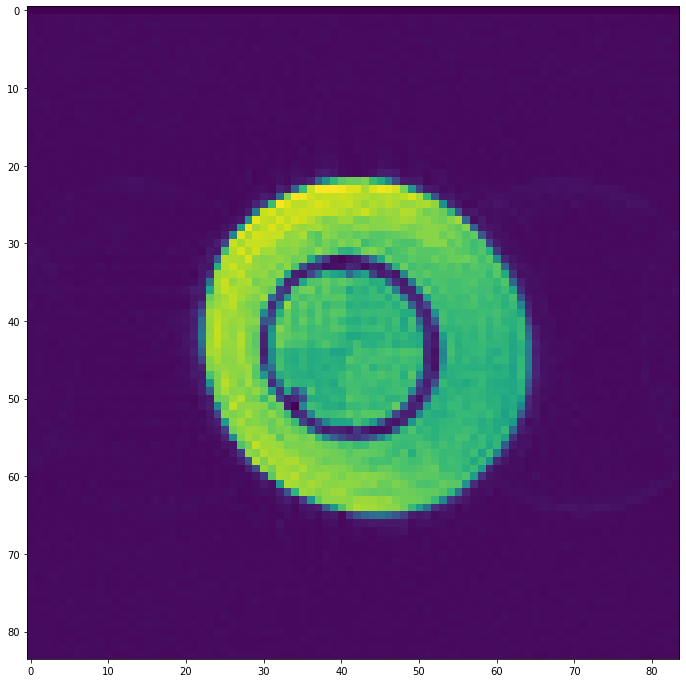

In [340]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.imshow(imOri)

In [267]:


filt = 'sobel'

output = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        out = change['new']
        return out
        
dropdown.observe(on_change)

display(dropdown)
display(output)

Dropdown(description='Edge Filter', options=('sobel', 'scharr'), value='sobel')

Output()

In [276]:
from ipywidgets import interactive
def f(x):
    return x

lvl = interactive(f, x = ['sobel','scharr'])
display(lvl)

interactive(children=(Dropdown(description='x', options=('sobel', 'scharr'), value='sobel'), Output()), _dom_c…

In [278]:
scaleFactor = 2
scaleChoise = interactive(f, x = scaleFactor)
display(scaleChoise)
scaleFactor = scaleChoise.result

interactive(children=(IntSlider(value=2, description='x', max=6, min=-2), Output()), _dom_classes=('widget-int…

In [282]:
            '''
            def f(x):
                return x
            filtChoise = interactive(f, x = ['sobel','scharr','prewitt'])
            display(filtChoise)
            filt = filtChoise.result
            scaleChoise = interactive(f, x = scaleFactor)
            display(scaleChoise)
            scaleFactor = scaleChoise.result
            '''

4

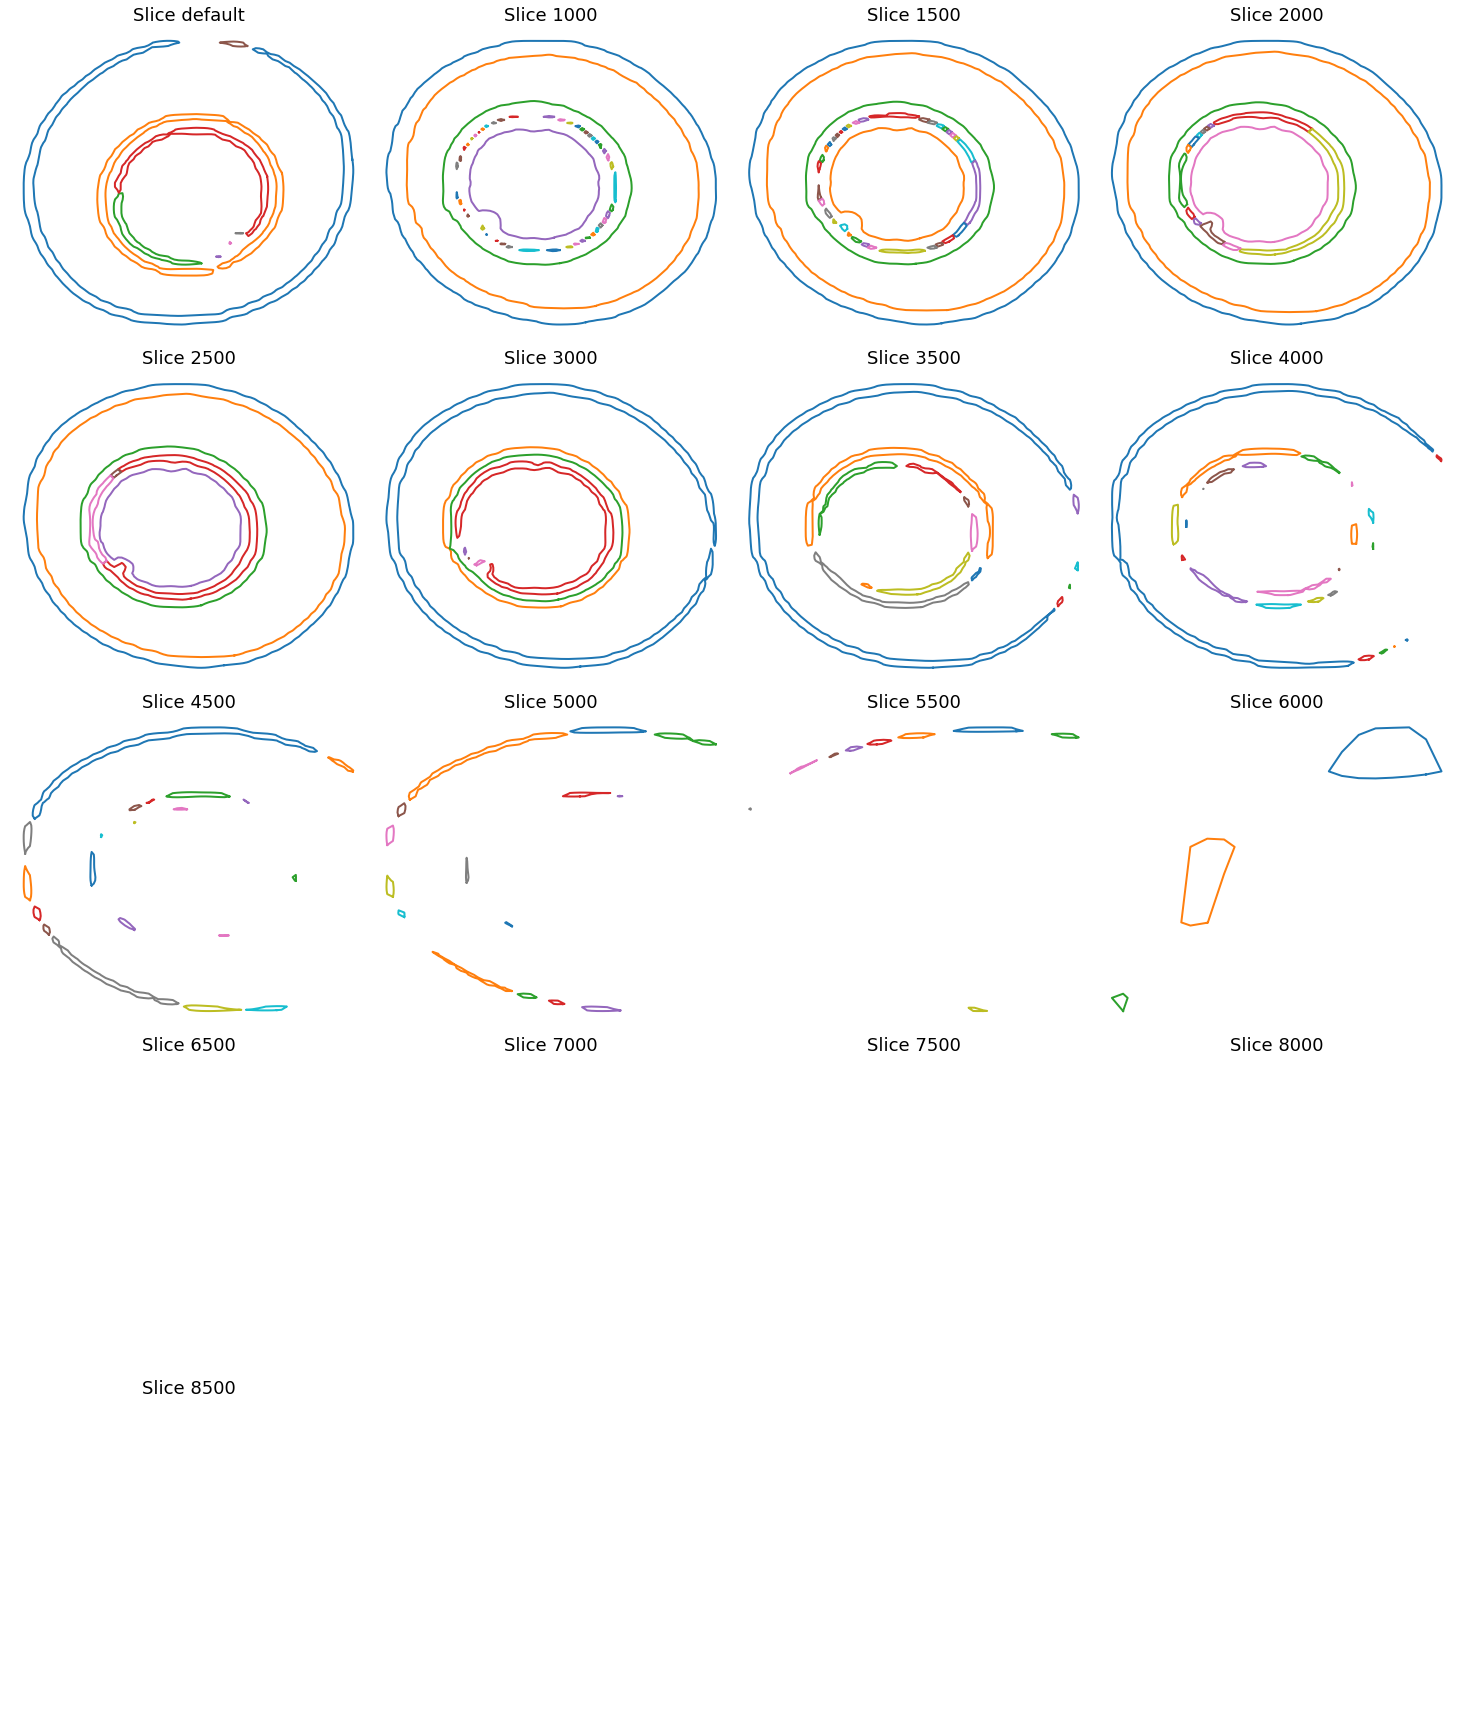

In [346]:
'''
contours =find_contours(im_sobel,level = 7500,fully_connected='high')
contours =find_contours(im_roberts,level = 8000,fully_connected='high')
fig, ax = plt.subplots()
ax.imshow(im_sobel)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()
'''

fig = plt.figure(figsize=(leng+10,leng+15)) # reduce the subplot size to make the plot tighter 
fig.subplots_adjust(hspace=0.0005, wspace=0.0005)      
ax = fig.add_subplot(int(leng/4 +1) ,4, 1) # non-integer results are given from the calculation
#ax.imshow(img)
contours =find_contours(img,fully_connected='high')
for n, contour in enumerate(contours):
    ax.plot(contour[:, 0], contour[:, 1], linewidth=2)
#im= plt.imshow(img)
ax.set_title('Slice default',fontsize=18)
ax.set_axis_off()

count = 2

for i in lvl:
    fig.subplots_adjust(hspace=0.1, wspace=0.0005)      
    ax = fig.add_subplot(int(leng/4 +1) ,4, count) # non-integer results are given from the calculation
    #ax.imshow(img)
    contours =find_contours(img,level = i,fully_connected='high')
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], -contour[:, 0], linewidth=2)
    #im= plt.imshow(img)
    ax.set_title('Slice '+str(i),fontsize=18)
    ax.set_axis_off()
    count+=1
plt.show()

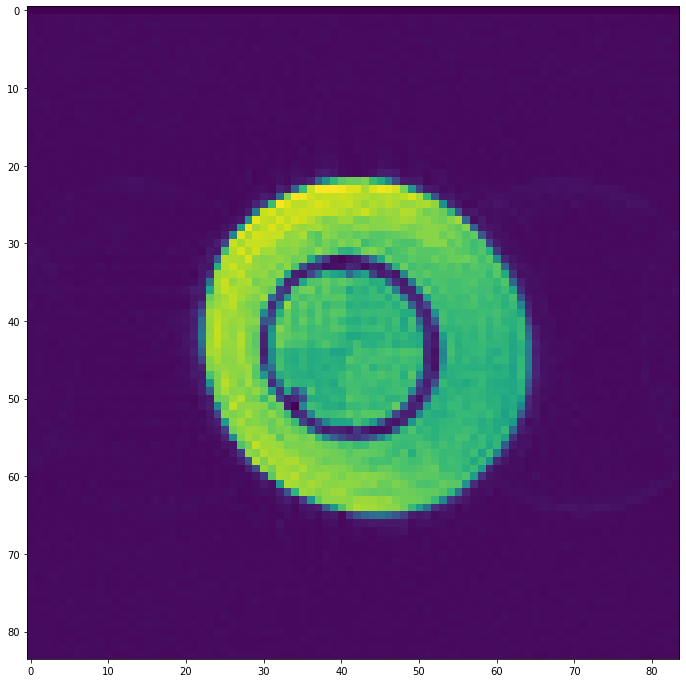

In [309]:
contours =find_contours(img,level = 2000, fully_connected='high')

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.imshow(imOri)
#ax.imshow(img)
plt.show()

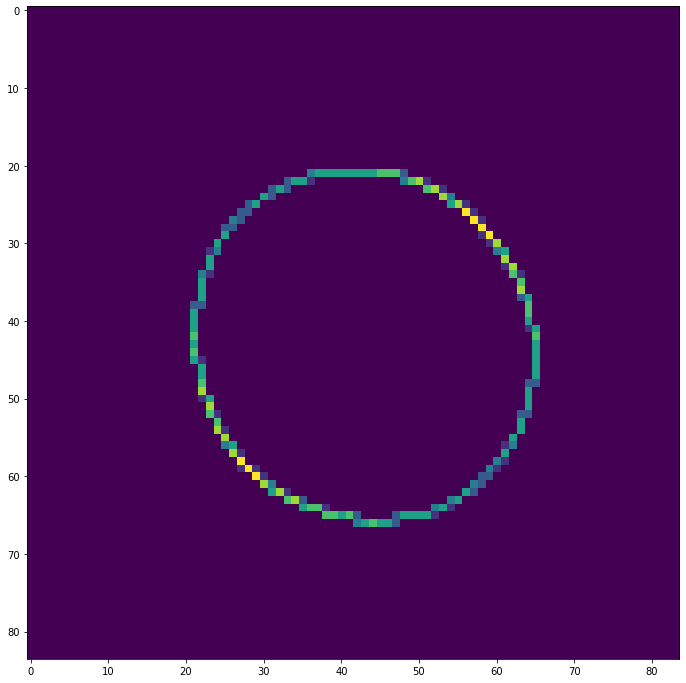

In [313]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
#ax.imshow(imOri)
imgd = downscale_local_mean(img, (4,4))
ax.imshow(imgd)
plt.show()

In [303]:
index = 0
img = np.zeros(im_prewitt.shape)
img[(contours[index][:,0]).astype('int'),(contours[index][:,1]).astype('int')]=1

/var/folders/qh/8lv4v0ws1g17mk7kcgk2bf4w0000gn/T/ipykernel_16084/1761546168.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  im = nib.load(epi_path).get_data()[:,:,slice_num,0]


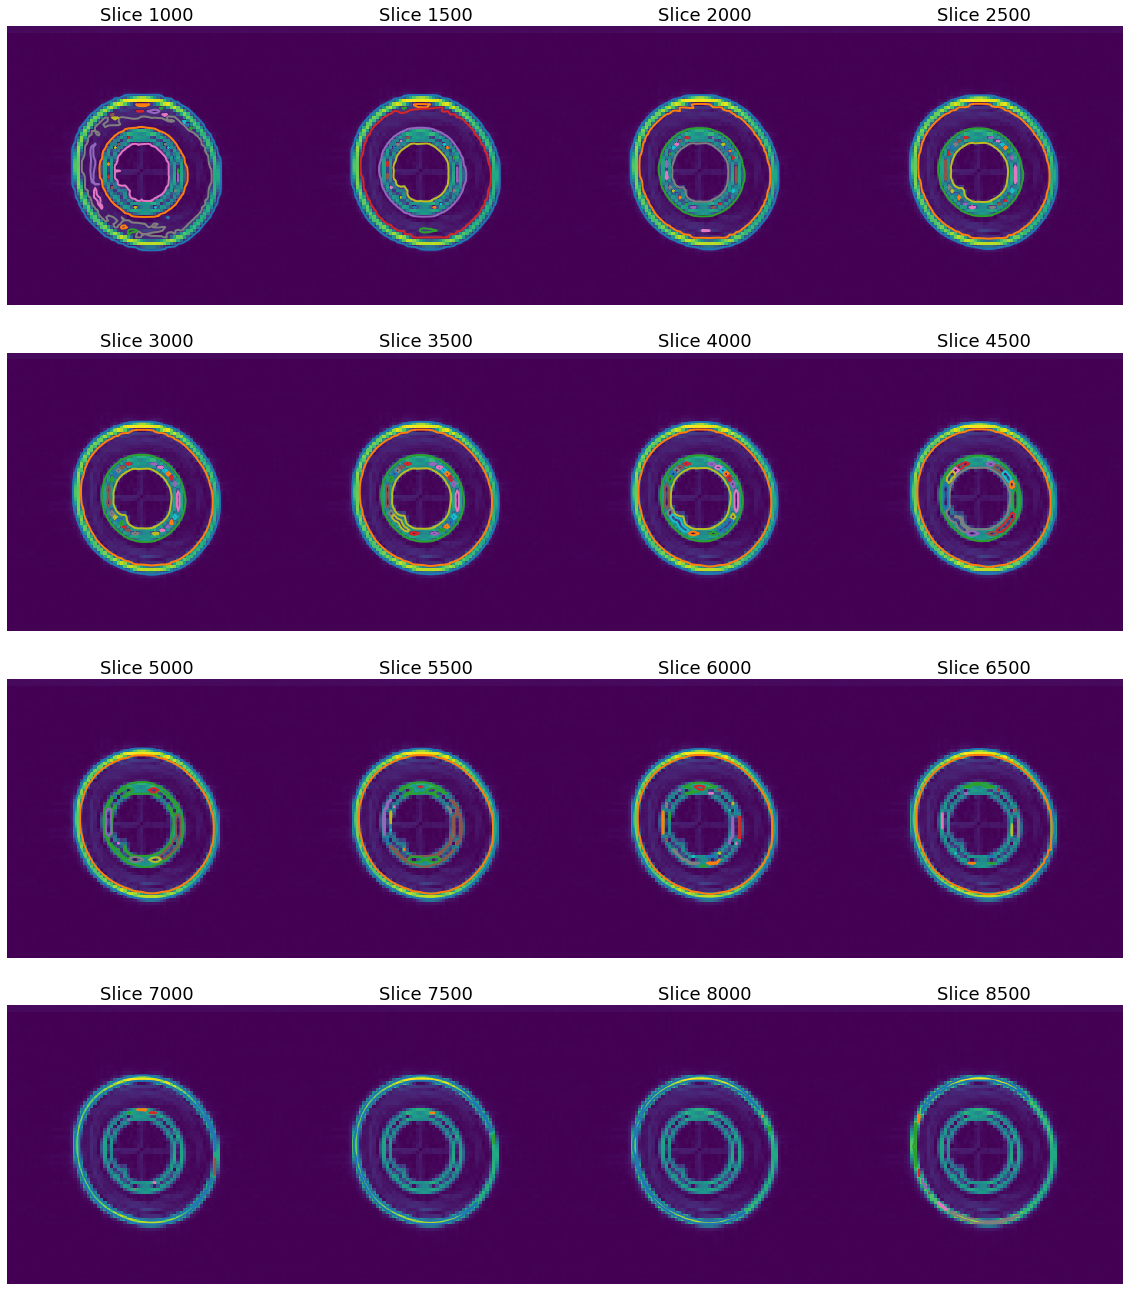

In [111]:
slice_num = 14
lvl=0.1
rad1=7
rad2=50
step=1
im = nib.load(epi_path).get_data()[:,:,slice_num,0]
im_sobel = filters.sobel(im)
im_roberts = filters.roberts(im)
im_scharr = filters.scharr(im)
im_prewitt = filters.prewitt(im)

'''
contours =find_contours(im_sobel,level = 7500,fully_connected='high')
contours =find_contours(im_roberts,level = 8000,fully_connected='high')
fig, ax = plt.subplots()
ax.imshow(im_sobel)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()
'''
img = im_prewitt
count = 1
lvl = range(1000,9000,500)
fig = plt.figure(figsize=(20,30)) # reduce the subplot size to make the plot tighter 

for i in lvl:
    fig.subplots_adjust(hspace=0, wspace=0.0005)      
    ax = fig.add_subplot(int(16/4 +1) ,4, count) # non-integer results are given from the calculation
    ax.imshow(img)
    contours =find_contours(img,level = i,fully_connected='high')
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    #im= plt.imshow(img)
    ax.set_title('Slice '+str(i),fontsize=18)
    ax.set_axis_off()
    count+=1
plt.show()

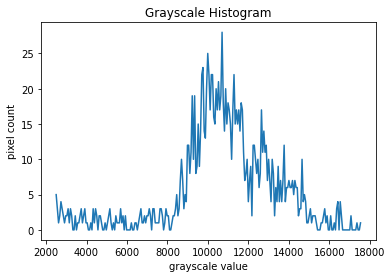

In [51]:
histogram, bin_edges = np.histogram(im, bins = 256, range = (2500,im.max()))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")


plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

In [335]:

stepNum = 20

In [336]:
# Obtain the range value 
lowTemp = im.min() # can be range based on the histogram 
highTemp = im.max()
stepTemp = (highTemp-lowTemp)/stepNum
Step = round(stepTemp)
lowRange = round(lowTemp + Step) # Subtract the first step to not include baseline
highRange = round(highTemp + Step)
# highRange = highTemp + Step # To include the highest intensity (not significant)
lvls = range(lowRange,highRange,Step)
leng = len(lvls)

In [337]:
Step

712

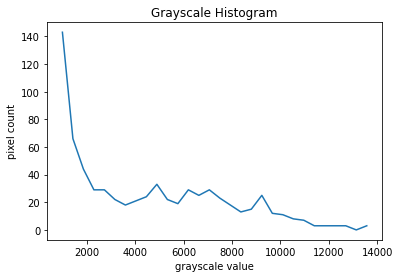

In [88]:
histogram, bin_edges = np.histogram(im_roberts, bins = 30, range = (1000,im_roberts.max()))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")


plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

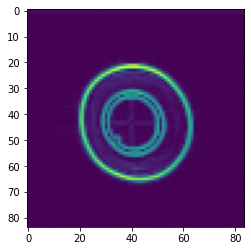

In [19]:
fig, ax = plt.subplots()
ax.imshow(im_sobel)
plt.show()

In [79]:
len(contours)

260

In [35]:
len(contours)

1

In [6]:
def inner_mask(data_path,slice_num,volume_num=0,lvl=0.004,rad1=7,rad2=50,step=1):
    
    im = nib.load(data_path).get_data()[:,:,slice_num,volume_num]
    im_sobel = sobel(im)
    repeat = 1
    
    while(repeat):
        contours =find_contours(im_sobel,level=lvl,fully_connected='high')
        for n, contour in enumerate(contours):
            plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
        plt.show()
        print('If this is not showing four circle boundaries, clearly - you need to change the thresholding level for finding contours again. If not changed, all subsequent estimation might fail.')
        repeat = int(input('Do you want to repeat and change the thresholding level? 1 for yes, 0 for no'))
        if repeat:
            print('Current level is:',lvl)
            print('\n')
            lvl = input('Enter the new lvl (integer)')
            
    smallest_circle = [] #detects the inner circle with notch
    for i in range(len(contours)):
        smallest_circle.append(contours[i].shape[0])
    temp_var = np.array(smallest_circle)
    temp_var = np.delete(temp_var,np.argmax(temp_var))
    temp_var = np.delete(temp_var,np.argmax(temp_var))
    temp_var = np.delete(temp_var,np.argmax(temp_var))
    index = np.argwhere(np.array(smallest_circle)==np.max(temp_var))[0][0]
    
    img = np.zeros(im.shape)
    img[(contours[index][:,0]).astype('int'),(contours[index][:,1]).astype('int')]=1
     
    hough_radii = np.arange(rad1, rad2, step)
    hough_res = hough_circle(img, hough_radii)
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=2)    
    radii_complete = radii[np.argmax(radii)]  # complete refers to the full circle with notch
    cx_complete = cx[np.argmax(radii)]
    cy_complete = cy[np.argmax(radii)]

    radii_incomplete = radii[np.argmin(radii)]  # complete refers to the circle without notch
    cx_incomplete = cx[np.argmin(radii)]
    cy_incomplete = cy[np.argmin(radii)]
    
    rr,cc = disk(cy_complete,cx_complete,radii_complete-1) # Erroded by 1 voxel for removing the notch
    img_complete = np.zeros(im.shape)
    img_complete[rr,cc]=1
    
    rr,cc = disk(cy_incomplete,cx_incomplete,radii_incomplete)
    img_incomplete = np.zeros(im.shape)
    img_incomplete[rr,cc]=1
    
    
    return img_complete,cy_complete,cx_complete,radii_complete 
